In [1]:
import pandas as pd
#read dataset
df = pd.read_csv('sample_disease_dataset.csv')
df.head()

,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,results
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [2]:
from sklearn import preprocessing
#min-max normalization 
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [3]:
from sklearn.model_selection import train_test_split
# split into input (X) and output (y) variables
X = x_scaled[:,0:8]
y = x_scaled[:,8]
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=12)


Using TensorFlow backend.
/Users/ndesignai/VENVS/image/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ndesignai/VENVS/image/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ndesignai/VENVS/image/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ndesignai/VENVS/image/lib/pytho




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


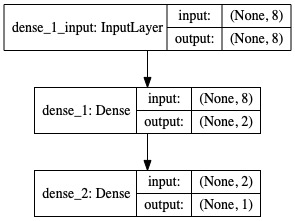

In [4]:
#importing library 
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='model.jpg',show_shapes=True, show_layer_names=True)

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=1500,batch_size=128,shuffle=True,verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 392 samples, validate on 98 samples
Epoch 1/1500
392/392 [==============================] - 0s 512us/step - loss: 0.7140 - acc: 0.6633 - val_loss: 0.7224 - val_acc: 0.6327
Epoch 2/1500
392/392 [==============================] - 0s 15us/step - loss: 0.7117 - acc: 0.6633 - val_loss: 0.7201 - val_acc: 0.6327
Epoch 3/1500
392/392 [==============================] - 0s 16us/step - loss: 0.7097 - acc: 0.6633 - val_loss: 0.7179 - val_acc: 0.6327
Epoch 4/1500
392/392 [==============================] - 0s 15us/step - loss: 0.7075 - acc: 0.6633 - val_loss: 0.7162 - val_acc: 0.6327
Epoch 5/1500
392/392 [==============================] - 0s 16us/step - loss: 0.7062 - acc: 0.6633 - val_loss: 0.7149 - val_acc: 0.6327
Epoch 6/1500
392/392 [==============================] - 0s 18us/step - loss: 0.7051 - acc: 0.6633 - val_loss: 0.7139 - val_acc: 0.6327
Epoch 7/1500
392/392 [=========================

392/392 [==============================] - 0s 18us/step - loss: 0.6751 - acc: 0.6684 - val_loss: 0.6771 - val_acc: 0.6429
Epoch 55/1500
392/392 [==============================] - 0s 15us/step - loss: 0.6749 - acc: 0.6684 - val_loss: 0.6766 - val_acc: 0.6429
Epoch 56/1500
392/392 [==============================] - 0s 13us/step - loss: 0.6745 - acc: 0.6684 - val_loss: 0.6762 - val_acc: 0.6429
Epoch 57/1500
392/392 [==============================] - 0s 17us/step - loss: 0.6741 - acc: 0.6684 - val_loss: 0.6758 - val_acc: 0.6429
Epoch 58/1500
392/392 [==============================] - 0s 16us/step - loss: 0.6738 - acc: 0.6684 - val_loss: 0.6752 - val_acc: 0.6429
Epoch 59/1500
392/392 [==============================] - 0s 14us/step - loss: 0.6734 - acc: 0.6684 - val_loss: 0.6747 - val_acc: 0.6429
Epoch 60/1500
392/392 [==============================] - 0s 15us/step - loss: 0.6730 - acc: 0.6684 - val_loss: 0.6741 - val_acc: 0.6429
Epoch 61/1500
392/392 [==============================] - 0s 14

392/392 [==============================] - 0s 14us/step - loss: 0.6593 - acc: 0.6658 - val_loss: 0.6611 - val_acc: 0.6633
Epoch 115/1500
392/392 [==============================] - 0s 13us/step - loss: 0.6590 - acc: 0.6658 - val_loss: 0.6608 - val_acc: 0.6633
Epoch 116/1500
392/392 [==============================] - 0s 12us/step - loss: 0.6588 - acc: 0.6658 - val_loss: 0.6606 - val_acc: 0.6633
Epoch 117/1500
392/392 [==============================] - 0s 14us/step - loss: 0.6586 - acc: 0.6684 - val_loss: 0.6603 - val_acc: 0.6633
Epoch 118/1500
392/392 [==============================] - 0s 14us/step - loss: 0.6584 - acc: 0.6684 - val_loss: 0.6600 - val_acc: 0.6633
Epoch 119/1500
392/392 [==============================] - 0s 13us/step - loss: 0.6582 - acc: 0.6684 - val_loss: 0.6599 - val_acc: 0.6633
Epoch 120/1500
392/392 [==============================] - 0s 13us/step - loss: 0.6580 - acc: 0.6684 - val_loss: 0.6598 - val_acc: 0.6633
Epoch 121/1500
392/392 [==============================] 

Epoch 174/1500
392/392 [==============================] - 0s 15us/step - loss: 0.6440 - acc: 0.6684 - val_loss: 0.6484 - val_acc: 0.6735
Epoch 175/1500
392/392 [==============================] - 0s 15us/step - loss: 0.6437 - acc: 0.6684 - val_loss: 0.6481 - val_acc: 0.6735
Epoch 176/1500
392/392 [==============================] - 0s 15us/step - loss: 0.6433 - acc: 0.6684 - val_loss: 0.6479 - val_acc: 0.6735
Epoch 177/1500
392/392 [==============================] - 0s 16us/step - loss: 0.6429 - acc: 0.6684 - val_loss: 0.6477 - val_acc: 0.6735
Epoch 178/1500
392/392 [==============================] - 0s 14us/step - loss: 0.6424 - acc: 0.6684 - val_loss: 0.6476 - val_acc: 0.6837
Epoch 179/1500
392/392 [==============================] - 0s 16us/step - loss: 0.6421 - acc: 0.6684 - val_loss: 0.6475 - val_acc: 0.6837
Epoch 180/1500
392/392 [==============================] - 0s 15us/step - loss: 0.6417 - acc: 0.6684 - val_loss: 0.6473 - val_acc: 0.6837
Epoch 181/1500
392/392 [=================

Epoch 234/1500
392/392 [==============================] - 0s 14us/step - loss: 0.6198 - acc: 0.6633 - val_loss: 0.6287 - val_acc: 0.7041
Epoch 235/1500
392/392 [==============================] - 0s 15us/step - loss: 0.6195 - acc: 0.6633 - val_loss: 0.6285 - val_acc: 0.7041
Epoch 236/1500
392/392 [==============================] - 0s 17us/step - loss: 0.6192 - acc: 0.6633 - val_loss: 0.6282 - val_acc: 0.7041
Epoch 237/1500
392/392 [==============================] - 0s 15us/step - loss: 0.6189 - acc: 0.6633 - val_loss: 0.6278 - val_acc: 0.7041
Epoch 238/1500
392/392 [==============================] - 0s 15us/step - loss: 0.6185 - acc: 0.6633 - val_loss: 0.6275 - val_acc: 0.7041
Epoch 239/1500
392/392 [==============================] - 0s 13us/step - loss: 0.6182 - acc: 0.6633 - val_loss: 0.6271 - val_acc: 0.7041
Epoch 240/1500
392/392 [==============================] - 0s 15us/step - loss: 0.6178 - acc: 0.6633 - val_loss: 0.6264 - val_acc: 0.7041
Epoch 241/1500
392/392 [=================

Epoch 294/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5947 - acc: 0.6709 - val_loss: 0.5982 - val_acc: 0.7143
Epoch 295/1500
392/392 [==============================] - 0s 12us/step - loss: 0.5942 - acc: 0.6684 - val_loss: 0.5975 - val_acc: 0.7143
Epoch 296/1500
392/392 [==============================] - 0s 12us/step - loss: 0.5939 - acc: 0.6684 - val_loss: 0.5968 - val_acc: 0.7041
Epoch 297/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5935 - acc: 0.6684 - val_loss: 0.5961 - val_acc: 0.7041
Epoch 298/1500
392/392 [==============================] - 0s 11us/step - loss: 0.5930 - acc: 0.6684 - val_loss: 0.5951 - val_acc: 0.7041
Epoch 299/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5929 - acc: 0.6837 - val_loss: 0.5943 - val_acc: 0.7041
Epoch 300/1500
392/392 [==============================] - 0s 12us/step - loss: 0.5926 - acc: 0.6837 - val_loss: 0.5936 - val_acc: 0.7041
Epoch 301/1500
392/392 [=================

Epoch 354/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5728 - acc: 0.6939 - val_loss: 0.5705 - val_acc: 0.6939
Epoch 355/1500
392/392 [==============================] - 0s 16us/step - loss: 0.5723 - acc: 0.6939 - val_loss: 0.5697 - val_acc: 0.6939
Epoch 356/1500
392/392 [==============================] - 0s 16us/step - loss: 0.5721 - acc: 0.6939 - val_loss: 0.5688 - val_acc: 0.6939
Epoch 357/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5717 - acc: 0.6990 - val_loss: 0.5684 - val_acc: 0.6939
Epoch 358/1500
392/392 [==============================] - 0s 15us/step - loss: 0.5713 - acc: 0.7015 - val_loss: 0.5681 - val_acc: 0.6939
Epoch 359/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5710 - acc: 0.7015 - val_loss: 0.5679 - val_acc: 0.6939
Epoch 360/1500
392/392 [==============================] - 0s 16us/step - loss: 0.5707 - acc: 0.6990 - val_loss: 0.5676 - val_acc: 0.6939
Epoch 361/1500
392/392 [=================

Epoch 414/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5545 - acc: 0.7219 - val_loss: 0.5467 - val_acc: 0.7143
Epoch 415/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5542 - acc: 0.7219 - val_loss: 0.5464 - val_acc: 0.7143
Epoch 416/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5538 - acc: 0.7194 - val_loss: 0.5462 - val_acc: 0.7143
Epoch 417/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5534 - acc: 0.7143 - val_loss: 0.5460 - val_acc: 0.7143
Epoch 418/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5532 - acc: 0.7168 - val_loss: 0.5460 - val_acc: 0.7143
Epoch 419/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5528 - acc: 0.7168 - val_loss: 0.5461 - val_acc: 0.6939
Epoch 420/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5529 - acc: 0.7143 - val_loss: 0.5461 - val_acc: 0.7041
Epoch 421/1500
392/392 [=================

Epoch 474/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5405 - acc: 0.7321 - val_loss: 0.5305 - val_acc: 0.7041
Epoch 475/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5403 - acc: 0.7321 - val_loss: 0.5305 - val_acc: 0.7143
Epoch 476/1500
392/392 [==============================] - 0s 12us/step - loss: 0.5401 - acc: 0.7321 - val_loss: 0.5307 - val_acc: 0.7143
Epoch 477/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5400 - acc: 0.7270 - val_loss: 0.5310 - val_acc: 0.7041
Epoch 478/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5398 - acc: 0.7245 - val_loss: 0.5311 - val_acc: 0.7041
Epoch 479/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5397 - acc: 0.7219 - val_loss: 0.5308 - val_acc: 0.7041
Epoch 480/1500
392/392 [==============================] - 0s 15us/step - loss: 0.5395 - acc: 0.7245 - val_loss: 0.5305 - val_acc: 0.7041
Epoch 481/1500
392/392 [=================

Epoch 534/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5300 - acc: 0.7296 - val_loss: 0.5202 - val_acc: 0.7041
Epoch 535/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5298 - acc: 0.7321 - val_loss: 0.5197 - val_acc: 0.7041
Epoch 536/1500
392/392 [==============================] - 0s 12us/step - loss: 0.5296 - acc: 0.7321 - val_loss: 0.5195 - val_acc: 0.7041
Epoch 537/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5293 - acc: 0.7321 - val_loss: 0.5197 - val_acc: 0.7041
Epoch 538/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5294 - acc: 0.7296 - val_loss: 0.5199 - val_acc: 0.7041
Epoch 539/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5293 - acc: 0.7296 - val_loss: 0.5202 - val_acc: 0.7143
Epoch 540/1500
392/392 [==============================] - 0s 15us/step - loss: 0.5294 - acc: 0.7296 - val_loss: 0.5204 - val_acc: 0.7245
Epoch 541/1500
392/392 [=================

Epoch 594/1500
392/392 [==============================] - 0s 16us/step - loss: 0.5218 - acc: 0.7296 - val_loss: 0.5117 - val_acc: 0.7245
Epoch 595/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5215 - acc: 0.7321 - val_loss: 0.5107 - val_acc: 0.7347
Epoch 596/1500
392/392 [==============================] - 0s 16us/step - loss: 0.5210 - acc: 0.7321 - val_loss: 0.5098 - val_acc: 0.7245
Epoch 597/1500
392/392 [==============================] - 0s 16us/step - loss: 0.5208 - acc: 0.7347 - val_loss: 0.5089 - val_acc: 0.7245
Epoch 598/1500
392/392 [==============================] - 0s 15us/step - loss: 0.5203 - acc: 0.7347 - val_loss: 0.5081 - val_acc: 0.7245
Epoch 599/1500
392/392 [==============================] - 0s 18us/step - loss: 0.5204 - acc: 0.7474 - val_loss: 0.5074 - val_acc: 0.7245
Epoch 600/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5204 - acc: 0.7423 - val_loss: 0.5070 - val_acc: 0.7245
Epoch 601/1500
392/392 [=================

Epoch 654/1500
392/392 [==============================] - 0s 16us/step - loss: 0.5143 - acc: 0.7347 - val_loss: 0.5041 - val_acc: 0.7347
Epoch 655/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5143 - acc: 0.7372 - val_loss: 0.5031 - val_acc: 0.7245
Epoch 656/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5138 - acc: 0.7423 - val_loss: 0.5023 - val_acc: 0.7245
Epoch 657/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5137 - acc: 0.7423 - val_loss: 0.5020 - val_acc: 0.7245
Epoch 658/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5136 - acc: 0.7449 - val_loss: 0.5017 - val_acc: 0.7245
Epoch 659/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5135 - acc: 0.7449 - val_loss: 0.5015 - val_acc: 0.7245
Epoch 660/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5135 - acc: 0.7449 - val_loss: 0.5011 - val_acc: 0.7245
Epoch 661/1500
392/392 [=================

Epoch 714/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5082 - acc: 0.7730 - val_loss: 0.4956 - val_acc: 0.7245
Epoch 715/1500
392/392 [==============================] - 0s 15us/step - loss: 0.5083 - acc: 0.7730 - val_loss: 0.4955 - val_acc: 0.7245
Epoch 716/1500
392/392 [==============================] - 0s 17us/step - loss: 0.5081 - acc: 0.7730 - val_loss: 0.4956 - val_acc: 0.7245
Epoch 717/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5079 - acc: 0.7704 - val_loss: 0.4955 - val_acc: 0.7245
Epoch 718/1500
392/392 [==============================] - 0s 16us/step - loss: 0.5080 - acc: 0.7730 - val_loss: 0.4953 - val_acc: 0.7245
Epoch 719/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5079 - acc: 0.7730 - val_loss: 0.4953 - val_acc: 0.7245
Epoch 720/1500
392/392 [==============================] - 0s 16us/step - loss: 0.5077 - acc: 0.7730 - val_loss: 0.4953 - val_acc: 0.7245
Epoch 721/1500
392/392 [=================

Epoch 774/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5021 - acc: 0.7526 - val_loss: 0.4932 - val_acc: 0.7347
Epoch 775/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5020 - acc: 0.7602 - val_loss: 0.4928 - val_acc: 0.7245
Epoch 776/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5019 - acc: 0.7628 - val_loss: 0.4925 - val_acc: 0.7245
Epoch 777/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5019 - acc: 0.7628 - val_loss: 0.4922 - val_acc: 0.7245
Epoch 778/1500
392/392 [==============================] - 0s 12us/step - loss: 0.5019 - acc: 0.7653 - val_loss: 0.4918 - val_acc: 0.7245
Epoch 779/1500
392/392 [==============================] - 0s 14us/step - loss: 0.5019 - acc: 0.7704 - val_loss: 0.4914 - val_acc: 0.7347
Epoch 780/1500
392/392 [==============================] - 0s 13us/step - loss: 0.5020 - acc: 0.7730 - val_loss: 0.4912 - val_acc: 0.7347
Epoch 781/1500
392/392 [=================

Epoch 834/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4973 - acc: 0.7704 - val_loss: 0.4875 - val_acc: 0.7449
Epoch 835/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4976 - acc: 0.7755 - val_loss: 0.4873 - val_acc: 0.7449
Epoch 836/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4975 - acc: 0.7755 - val_loss: 0.4872 - val_acc: 0.7449
Epoch 837/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4974 - acc: 0.7781 - val_loss: 0.4872 - val_acc: 0.7449
Epoch 838/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4973 - acc: 0.7781 - val_loss: 0.4873 - val_acc: 0.7449
Epoch 839/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4971 - acc: 0.7730 - val_loss: 0.4877 - val_acc: 0.7347
Epoch 840/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4970 - acc: 0.7730 - val_loss: 0.4880 - val_acc: 0.7449
Epoch 841/1500
392/392 [=================

Epoch 894/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4929 - acc: 0.7602 - val_loss: 0.4871 - val_acc: 0.7449
Epoch 895/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4926 - acc: 0.7653 - val_loss: 0.4861 - val_acc: 0.7551
Epoch 896/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4927 - acc: 0.7704 - val_loss: 0.4851 - val_acc: 0.7551
Epoch 897/1500
392/392 [==============================] - 0s 16us/step - loss: 0.4928 - acc: 0.7755 - val_loss: 0.4845 - val_acc: 0.7449
Epoch 898/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4927 - acc: 0.7755 - val_loss: 0.4844 - val_acc: 0.7449
Epoch 899/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4927 - acc: 0.7755 - val_loss: 0.4842 - val_acc: 0.7449
Epoch 900/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4928 - acc: 0.7755 - val_loss: 0.4840 - val_acc: 0.7449
Epoch 901/1500
392/392 [=================

Epoch 954/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4893 - acc: 0.7679 - val_loss: 0.4859 - val_acc: 0.7449
Epoch 955/1500
392/392 [==============================] - 0s 16us/step - loss: 0.4891 - acc: 0.7679 - val_loss: 0.4855 - val_acc: 0.7551
Epoch 956/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4889 - acc: 0.7679 - val_loss: 0.4847 - val_acc: 0.7449
Epoch 957/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4888 - acc: 0.7679 - val_loss: 0.4840 - val_acc: 0.7551
Epoch 958/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4887 - acc: 0.7730 - val_loss: 0.4834 - val_acc: 0.7551
Epoch 959/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4887 - acc: 0.7781 - val_loss: 0.4832 - val_acc: 0.7551
Epoch 960/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4886 - acc: 0.7755 - val_loss: 0.4832 - val_acc: 0.7551
Epoch 961/1500
392/392 [=================

Epoch 1014/1500
392/392 [==============================] - 0s 16us/step - loss: 0.4858 - acc: 0.7781 - val_loss: 0.4812 - val_acc: 0.7551
Epoch 1015/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4856 - acc: 0.7781 - val_loss: 0.4815 - val_acc: 0.7551
Epoch 1016/1500
392/392 [==============================] - 0s 16us/step - loss: 0.4856 - acc: 0.7781 - val_loss: 0.4819 - val_acc: 0.7551
Epoch 1017/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4854 - acc: 0.7781 - val_loss: 0.4819 - val_acc: 0.7551
Epoch 1018/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4854 - acc: 0.7781 - val_loss: 0.4818 - val_acc: 0.7551
Epoch 1019/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4853 - acc: 0.7781 - val_loss: 0.4819 - val_acc: 0.7551
Epoch 1020/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4853 - acc: 0.7781 - val_loss: 0.4822 - val_acc: 0.7551
Epoch 1021/1500
392/392 [=========

392/392 [==============================] - 0s 13us/step - loss: 0.4826 - acc: 0.7806 - val_loss: 0.4825 - val_acc: 0.7449
Epoch 1074/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4826 - acc: 0.7832 - val_loss: 0.4831 - val_acc: 0.7449
Epoch 1075/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4826 - acc: 0.7832 - val_loss: 0.4837 - val_acc: 0.7449
Epoch 1076/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4826 - acc: 0.7806 - val_loss: 0.4840 - val_acc: 0.7449
Epoch 1077/1500
392/392 [==============================] - 0s 12us/step - loss: 0.4827 - acc: 0.7806 - val_loss: 0.4843 - val_acc: 0.7449
Epoch 1078/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4828 - acc: 0.7704 - val_loss: 0.4845 - val_acc: 0.7449
Epoch 1079/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4827 - acc: 0.7730 - val_loss: 0.4838 - val_acc: 0.7449
Epoch 1080/1500
392/392 [=========================

392/392 [==============================] - 0s 13us/step - loss: 0.4802 - acc: 0.7806 - val_loss: 0.4781 - val_acc: 0.7551
Epoch 1133/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4801 - acc: 0.7806 - val_loss: 0.4782 - val_acc: 0.7551
Epoch 1134/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4800 - acc: 0.7781 - val_loss: 0.4786 - val_acc: 0.7551
Epoch 1135/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4796 - acc: 0.7832 - val_loss: 0.4792 - val_acc: 0.7551
Epoch 1136/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4795 - acc: 0.7883 - val_loss: 0.4796 - val_acc: 0.7551
Epoch 1137/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4795 - acc: 0.7832 - val_loss: 0.4796 - val_acc: 0.7551
Epoch 1138/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4794 - acc: 0.7857 - val_loss: 0.4793 - val_acc: 0.7551
Epoch 1139/1500
392/392 [=========================

392/392 [==============================] - 0s 15us/step - loss: 0.4772 - acc: 0.7857 - val_loss: 0.4804 - val_acc: 0.7551
Epoch 1192/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4772 - acc: 0.7857 - val_loss: 0.4797 - val_acc: 0.7551
Epoch 1193/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4769 - acc: 0.7857 - val_loss: 0.4792 - val_acc: 0.7551
Epoch 1194/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4772 - acc: 0.7806 - val_loss: 0.4786 - val_acc: 0.7551
Epoch 1195/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4771 - acc: 0.7832 - val_loss: 0.4786 - val_acc: 0.7551
Epoch 1196/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4771 - acc: 0.7832 - val_loss: 0.4788 - val_acc: 0.7551
Epoch 1197/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4770 - acc: 0.7857 - val_loss: 0.4787 - val_acc: 0.7551
Epoch 1198/1500
392/392 [=========================

392/392 [==============================] - 0s 14us/step - loss: 0.4756 - acc: 0.7883 - val_loss: 0.4833 - val_acc: 0.7449
Epoch 1251/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4755 - acc: 0.7883 - val_loss: 0.4827 - val_acc: 0.7551
Epoch 1252/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4752 - acc: 0.7934 - val_loss: 0.4819 - val_acc: 0.7551
Epoch 1253/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4747 - acc: 0.7908 - val_loss: 0.4804 - val_acc: 0.7551
Epoch 1254/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4744 - acc: 0.7857 - val_loss: 0.4793 - val_acc: 0.7551
Epoch 1255/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4747 - acc: 0.7883 - val_loss: 0.4791 - val_acc: 0.7551
Epoch 1256/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4747 - acc: 0.7832 - val_loss: 0.4790 - val_acc: 0.7551
Epoch 1257/1500
392/392 [=========================

392/392 [==============================] - 0s 13us/step - loss: 0.4735 - acc: 0.7883 - val_loss: 0.4775 - val_acc: 0.7755
Epoch 1310/1500
392/392 [==============================] - 0s 17us/step - loss: 0.4734 - acc: 0.7883 - val_loss: 0.4773 - val_acc: 0.7755
Epoch 1311/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4736 - acc: 0.7883 - val_loss: 0.4770 - val_acc: 0.7653
Epoch 1312/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4736 - acc: 0.7883 - val_loss: 0.4770 - val_acc: 0.7755
Epoch 1313/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4737 - acc: 0.7857 - val_loss: 0.4767 - val_acc: 0.7755
Epoch 1314/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4740 - acc: 0.7857 - val_loss: 0.4766 - val_acc: 0.7755
Epoch 1315/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4739 - acc: 0.7857 - val_loss: 0.4768 - val_acc: 0.7755
Epoch 1316/1500
392/392 [=========================

392/392 [==============================] - 0s 15us/step - loss: 0.4718 - acc: 0.7934 - val_loss: 0.4826 - val_acc: 0.7347
Epoch 1369/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4717 - acc: 0.7934 - val_loss: 0.4822 - val_acc: 0.7347
Epoch 1370/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4715 - acc: 0.7934 - val_loss: 0.4817 - val_acc: 0.7347
Epoch 1371/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4716 - acc: 0.7908 - val_loss: 0.4808 - val_acc: 0.7347
Epoch 1372/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4711 - acc: 0.7908 - val_loss: 0.4806 - val_acc: 0.7347
Epoch 1373/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4710 - acc: 0.7883 - val_loss: 0.4804 - val_acc: 0.7347
Epoch 1374/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4709 - acc: 0.7832 - val_loss: 0.4796 - val_acc: 0.7449
Epoch 1375/1500
392/392 [=========================

392/392 [==============================] - 0s 13us/step - loss: 0.4701 - acc: 0.7883 - val_loss: 0.4770 - val_acc: 0.7755
Epoch 1428/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4702 - acc: 0.7883 - val_loss: 0.4769 - val_acc: 0.7755
Epoch 1429/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4701 - acc: 0.7883 - val_loss: 0.4770 - val_acc: 0.7755
Epoch 1430/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4699 - acc: 0.7857 - val_loss: 0.4774 - val_acc: 0.7857
Epoch 1431/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4697 - acc: 0.7832 - val_loss: 0.4779 - val_acc: 0.7755
Epoch 1432/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4695 - acc: 0.7832 - val_loss: 0.4780 - val_acc: 0.7755
Epoch 1433/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4695 - acc: 0.7832 - val_loss: 0.4778 - val_acc: 0.7857
Epoch 1434/1500
392/392 [=========================

392/392 [==============================] - 0s 13us/step - loss: 0.4681 - acc: 0.7883 - val_loss: 0.4805 - val_acc: 0.7449
Epoch 1487/1500
392/392 [==============================] - 0s 14us/step - loss: 0.4681 - acc: 0.7857 - val_loss: 0.4806 - val_acc: 0.7449
Epoch 1488/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4681 - acc: 0.7883 - val_loss: 0.4807 - val_acc: 0.7347
Epoch 1489/1500
392/392 [==============================] - 0s 12us/step - loss: 0.4681 - acc: 0.7883 - val_loss: 0.4804 - val_acc: 0.7449
Epoch 1490/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4680 - acc: 0.7832 - val_loss: 0.4801 - val_acc: 0.7551
Epoch 1491/1500
392/392 [==============================] - 0s 15us/step - loss: 0.4681 - acc: 0.7832 - val_loss: 0.4798 - val_acc: 0.7653
Epoch 1492/1500
392/392 [==============================] - 0s 13us/step - loss: 0.4679 - acc: 0.7832 - val_loss: 0.4793 - val_acc: 0.7653
Epoch 1493/1500
392/392 [=========================

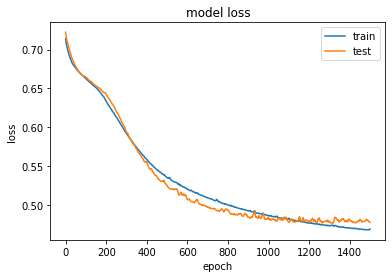

In [6]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [7]:
# Evaluating model on validation data
evaluate = model.evaluate(X_val,y_val)
print(evaluate)

98/98 [==============================] - 0s 25us/step
[0.47769237203257425, 0.7755102040816326]
